In [1]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [4]:
import numpy as np
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [5]:
x_test=x_test.reshape(-1,784)
x_test_noisy=x_test_noisy.reshape(-1,784)
x_train_noisy=x_train_noisy.reshape(-1,784)
x_train=x_train.reshape(-1,784)

In [6]:
x_test.shape

(10000, 784)

In [7]:
model=keras.Sequential() #Create a network sequence.

model.add(Input(shape=(784,)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(784,activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [8]:
#model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
model.compile(optimizer='Adam',loss="binary_crossentropy") 
results= model.fit(x_train_noisy,x_train,epochs=10,batch_size=128,validation_data=(x_test_noisy, x_test))



Epoch 1/10
469/469 [==============================] - 10s 10ms/step - loss: 0.2306 - val_loss: 0.1757
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1645 - val_loss: 0.1548
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1511 - val_loss: 0.1457
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1435 - val_loss: 0.1423
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1379 - val_loss: 0.1347
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1335 - val_loss: 0.1306
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1305 - val_loss: 0.1284
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1283 - val_loss: 0.1277
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1267 - val_loss: 0.1255
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1253 - val_loss: 0.12

In [9]:
score = model.evaluate(x_test_noisy, x_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.1241


In [10]:
x1=x_test.reshape(-1,28,28)
x2=x_test_noisy.reshape(-1,28,28)
x3=x_train.reshape(-1,28,28)
x4=x_train_noisy.reshape(-1,28,28)

In [11]:
y_pred=model.predict(x_test_noisy)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 784)

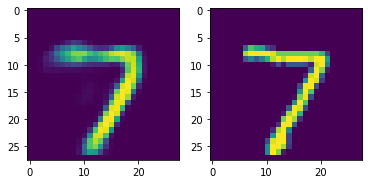

In [12]:
plt.subplot(1,2,1)
plt.imshow(y_pred[0].reshape(28,28))
plt.subplot(1,2,2)
plt.imshow(x_test[0].reshape(28,28))